## 국가별 음주 데이터 분석하기
### 탐색 : 데이터의 기초 정보 살펴보기 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

path = '../data/drinks.csv'
drinks = pd.read_csv(path)
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [3]:
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 인사이트 발견 : 탐색과 시각화
- 피처 간의 상관 관계를 통계적으로 탐색하는 방법
    1. 단순 상관 분석 방법 : 피처가 2개일 때의 상관 계수 계산
    2. 다중 상관 분석 : 대상 피처가 여러 개일 때 상호 간의 연관성을 분석
    - 상관 분석 : 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것

In [5]:
# corr로 두 피처에 대한 상관 관수 계산 
# method = 'pearson'은 가장 널리 쓰이는 계산 방법
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [6]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


### 시각화

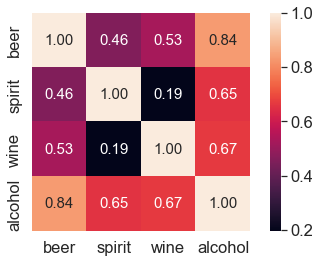

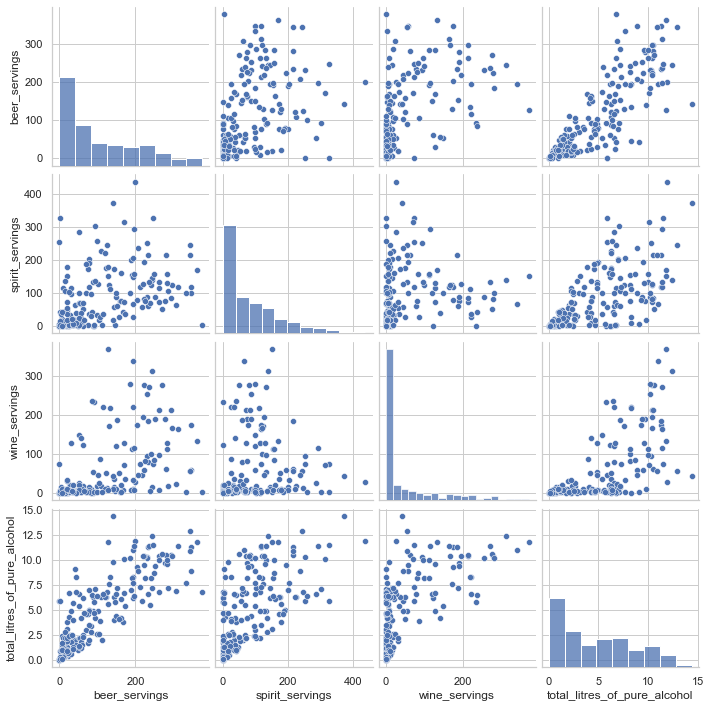

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

sns.set(style='whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']],
            height = 2.5)

plt.show()

### 탐색적 분석
- filna() 함수를 사용하여 NaN 값을 OT로 채움

In [11]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


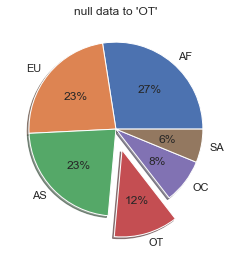

In [12]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode = explode, labels = labels, autopct = '%.0f%%', shadow = True)
plt.title('null data to \'OT\'')
plt.show()

### 대륙별 spirit_servings의 통계적 정보는 어느 정도일까?
- agg() 함수를 사용하여 대륙 단위로 분석 수행 
- agg() 함수는 인자로 들어가는 함수 파라미터를 병렬로 설정하여 그룹에 대한 연산 결과를 동시에 얻을 수 있는 함수
- agg['mean', 'min', 'max', 'sum'] 

In [13]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까? 
- mean() 함수와 필터링으로 탐색 수행

In [14]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64